In [1]:
import pandas as pd

df = pd.read_csv('vgsales.csv')
df.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [2]:
# Check data types and missing values
df.info()
print(df.isnull().sum())

# Drop rows with missing values in critical columns
df = df.dropna(subset=['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Global_Sales'])

# Convert 'Year' to integer if needed
df['Year'] = df['Year'].astype(int)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1901 entries, 0 to 1900
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          1901 non-null   int64  
 1   Name          1901 non-null   object 
 2   Platform      1901 non-null   object 
 3   Year          1901 non-null   int64  
 4   Genre         1901 non-null   object 
 5   Publisher     1901 non-null   object 
 6   NA_Sales      1901 non-null   float64
 7   EU_Sales      1901 non-null   float64
 8   JP_Sales      1901 non-null   float64
 9   Other_Sales   1901 non-null   float64
 10  Global_Sales  1901 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 163.5+ KB
Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


In [3]:
top_games = df[['Name', 'Global_Sales']].sort_values(by='Global_Sales', ascending=False).head(10)
print(top_games)


                        Name  Global_Sales
0                 Wii Sports         82.74
1          Super Mario Bros.         40.24
2             Mario Kart Wii         35.82
3          Wii Sports Resort         33.00
4   Pokemon Red/Pokemon Blue         31.37
5                     Tetris         30.26
6      New Super Mario Bros.         30.01
7                   Wii Play         29.02
8  New Super Mario Bros. Wii         28.62
9                  Duck Hunt         28.31


In [4]:
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
print(platform_sales.head(10))


Platform
PS2     769.40
X360    660.64
Wii     624.30
PS3     617.30
DS      460.33
PS      435.35
GB      235.59
NES     225.93
PS4     214.16
3DS     159.24
Name: Global_Sales, dtype: float64


In [5]:
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
print(genre_sales)


Genre
Action          1032.62
Sports           763.46
Shooter          753.37
Platform         643.22
Role-Playing     617.72
Racing           465.65
Misc             459.62
Fighting         259.59
Simulation       217.24
Puzzle           152.99
Adventure         88.74
Strategy          61.49
Name: Global_Sales, dtype: float64


In [6]:
publisher_sales = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)
print(publisher_sales.head(10))


Publisher
Nintendo                       1640.18
Electronic Arts                 709.83
Activision                      473.25
Sony Computer Entertainment     420.80
Take-Two Interactive            305.79
Ubisoft                         257.57
Microsoft Game Studios          206.49
THQ                             146.50
Sega                            127.35
Capcom                          121.95
Name: Global_Sales, dtype: float64


In [7]:
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
print(region_sales)


NA_Sales       2708.42
EU_Sales       1604.01
JP_Sales        684.44
Other_Sales     518.81
dtype: float64


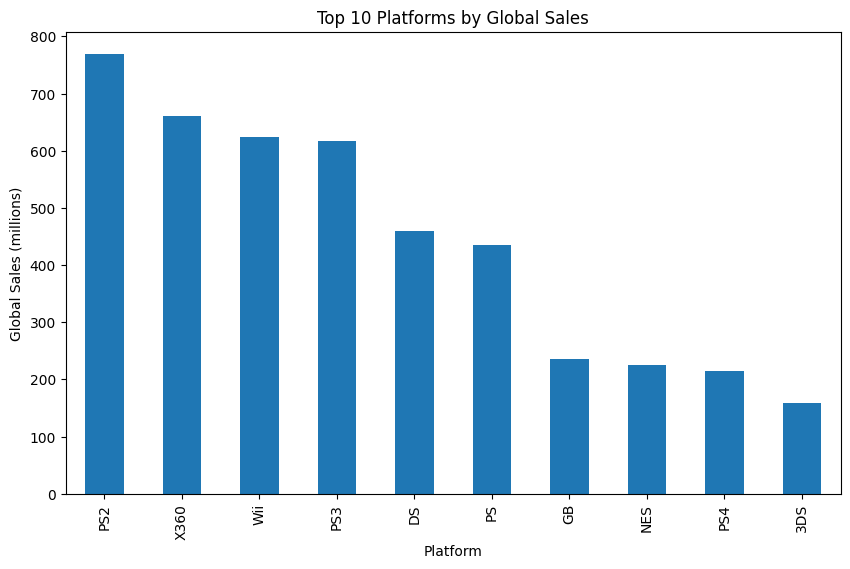

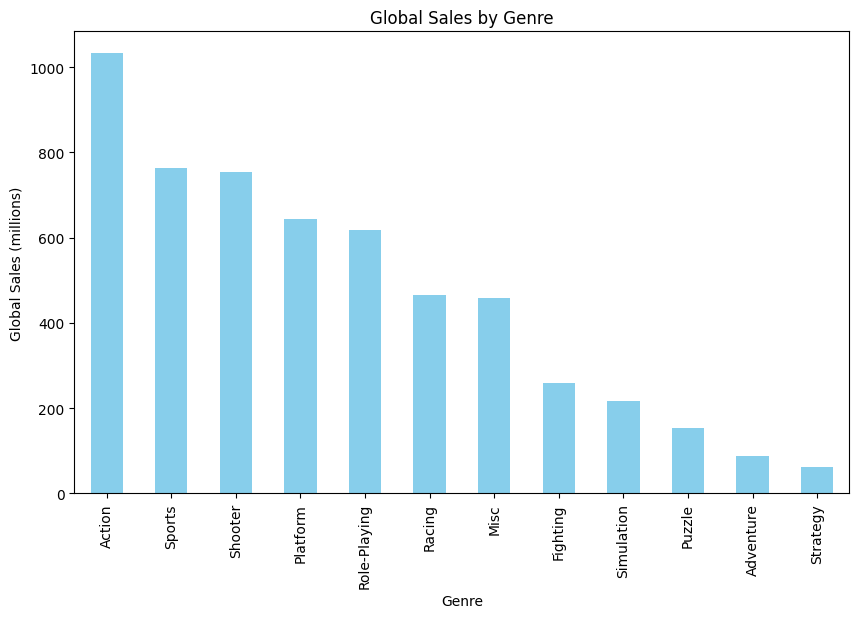

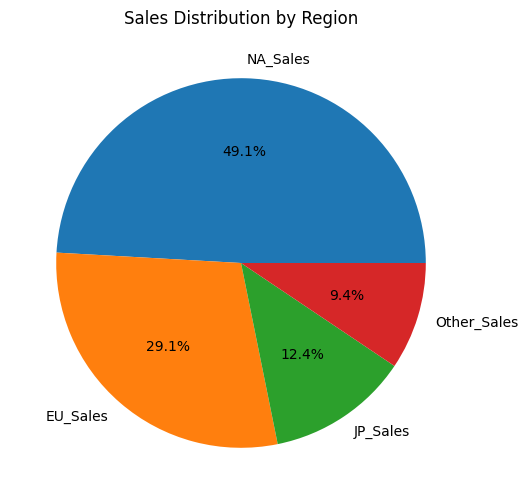

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top platforms
plt.figure(figsize=(10,6))
platform_sales.head(10).plot(kind='bar')
plt.title('Top 10 Platforms by Global Sales')
plt.ylabel('Global Sales (millions)')
plt.xlabel('Platform')
plt.show()

# Sales by genre
plt.figure(figsize=(10,6))
genre_sales.plot(kind='bar', color='skyblue')
plt.title('Global Sales by Genre')
plt.ylabel('Global Sales (millions)')
plt.xlabel('Genre')
plt.show()

# Regional sales
plt.figure(figsize=(8,6))
region_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales Distribution by Region')
plt.ylabel('')
plt.show()


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load data
df = pd.read_csv('vgsales.csv')

# Drop rows with missing values in key columns
df = df.dropna(subset=['Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'])

# Encode categorical variables
le_platform = LabelEncoder()
le_publisher = LabelEncoder()

df['Platform_enc'] = le_platform.fit_transform(df['Platform'])
df['Publisher_enc'] = le_publisher.fit_transform(df['Publisher'])

# Features and target
X = df[['Platform_enc', 'Year', 'Publisher_enc', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
y = df['Genre']

# Encode target
le_genre = LabelEncoder()
y_enc = le_genre.fit_transform(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn, target_names=le_genre.classes_))


KNN Accuracy: 0.31758530183727035
              precision    recall  f1-score   support

      Action       0.33      0.51      0.40        85
   Adventure       0.00      0.00      0.00        12
    Fighting       0.05      0.04      0.05        23
        Misc       0.20      0.15      0.17        26
    Platform       0.29      0.40      0.33        30
      Puzzle       0.14      0.12      0.13         8
      Racing       0.17      0.11      0.13        37
Role-Playing       0.36      0.36      0.36        33
     Shooter       0.18      0.15      0.16        48
  Simulation       0.22      0.14      0.17        14
      Sports       0.65      0.61      0.63        57
    Strategy       0.00      0.00      0.00         8

    accuracy                           0.32       381
   macro avg       0.22      0.22      0.21       381
weighted avg       0.29      0.32      0.30       381



In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

# Set zero_division=0 to suppress the warning
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg, target_names=le_genre.classes_, zero_division=0))


Logistic Regression Accuracy: 0.2440944881889764
              precision    recall  f1-score   support

      Action       0.25      0.53      0.34        85
   Adventure       0.00      0.00      0.00        12
    Fighting       0.00      0.00      0.00        23
        Misc       0.00      0.00      0.00        26
    Platform       0.19      0.33      0.24        30
      Puzzle       0.00      0.00      0.00         8
      Racing       0.00      0.00      0.00        37
Role-Playing       0.33      0.42      0.37        33
     Shooter       0.29      0.21      0.24        48
  Simulation       0.00      0.00      0.00        14
      Sports       0.23      0.25      0.24        57
    Strategy       0.00      0.00      0.00         8

    accuracy                           0.24       381
   macro avg       0.11      0.15      0.12       381
weighted avg       0.17      0.24      0.19       381



In [15]:
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
for label, count in zip(le_genre.inverse_transform(unique), counts):
    print(f"{label}: {count} samples")


Action: 304 samples
Adventure: 26 samples
Fighting: 88 samples
Misc: 130 samples
Platform: 153 samples
Puzzle: 43 samples
Racing: 125 samples
Role-Playing: 157 samples
Shooter: 187 samples
Simulation: 69 samples
Sports: 219 samples
Strategy: 19 samples


In [16]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=le_genre.classes_, zero_division=0))


Random Forest Accuracy: 0.3963254593175853
              precision    recall  f1-score   support

      Action       0.42      0.59      0.49        85
   Adventure       0.00      0.00      0.00        12
    Fighting       0.17      0.04      0.07        23
        Misc       0.20      0.15      0.17        26
    Platform       0.27      0.43      0.33        30
      Puzzle       0.18      0.25      0.21         8
      Racing       0.20      0.11      0.14        37
Role-Playing       0.47      0.55      0.51        33
     Shooter       0.45      0.31      0.37        48
  Simulation       0.33      0.29      0.31        14
      Sports       0.57      0.68      0.62        57
    Strategy       0.25      0.12      0.17         8

    accuracy                           0.40       381
   macro avg       0.29      0.29      0.28       381
weighted avg       0.36      0.40      0.37       381



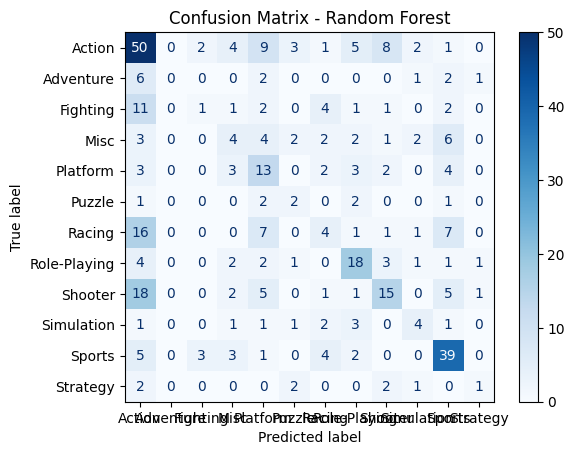

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_genre.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Random Forest')
plt.show()


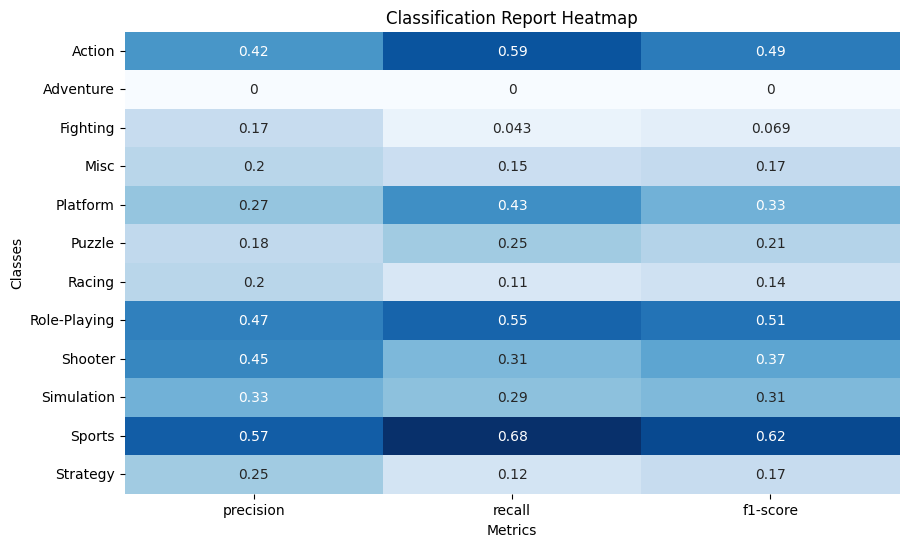

In [18]:
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report

def plot_classification_report(y_true, y_pred, labels):
    report_dict = classification_report(y_true, y_pred, target_names=labels, output_dict=True, zero_division=0)
    # Extract precision, recall, f1-score for each class
    metrics = ['precision', 'recall', 'f1-score']
    data = []
    for label in labels:
        data.append([report_dict[label][metric] for metric in metrics])
    data = np.array(data)
    
    plt.figure(figsize=(10, len(labels)*0.5))
    sns.heatmap(data, annot=True, cmap='Blues', xticklabels=metrics, yticklabels=labels, cbar=False)
    plt.title('Classification Report Heatmap')
    plt.ylabel('Classes')
    plt.xlabel('Metrics')
    plt.show()

# Usage example for Random Forest
plot_classification_report(y_test, y_pred_rf, le_genre.classes_)


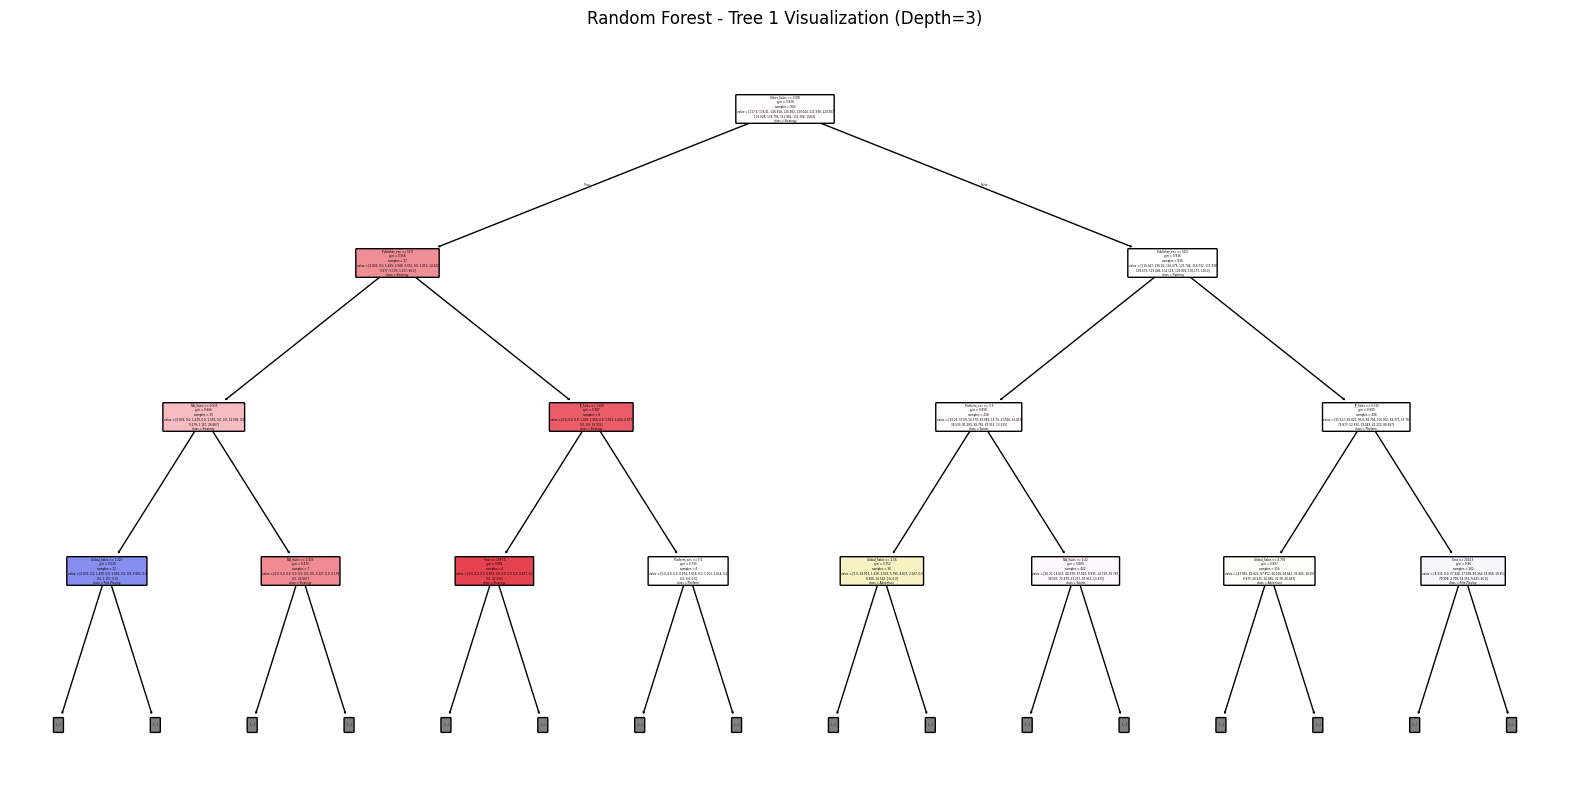

In [19]:
from sklearn.tree import plot_tree

# Visualize the first tree in the forest
plt.figure(figsize=(20,10))
plot_tree(rf.estimators_[0], feature_names=X.columns, class_names=le_genre.classes_, filled=True, rounded=True, max_depth=3)
plt.title('Random Forest - Tree 1 Visualization (Depth=3)')
plt.show()


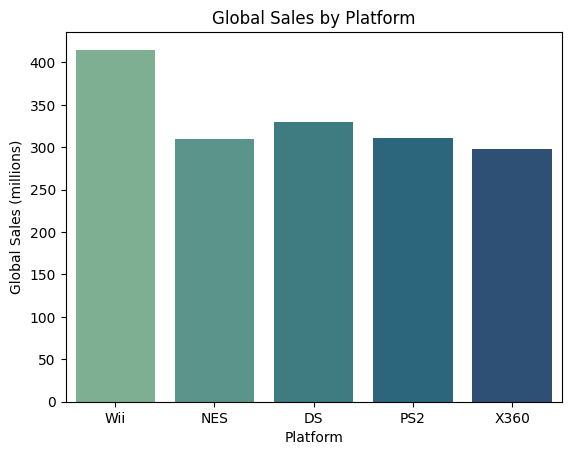

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'Platform': ['Wii', 'NES', 'DS', 'PS2', 'X360'],
    'Global_Sales': [414.95, 309.13, 329.93, 310.64, 297.53]
}
df = pd.DataFrame(data)

sns.barplot(x='Platform', y='Global_Sales', data=df, hue='Platform', palette='crest', dodge=False)
plt.legend([],[], frameon=False)  # Hide legend
plt.title('Global Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales (millions)')
plt.show()



<Axes: xlabel='Platform', ylabel='Global_Sales'>

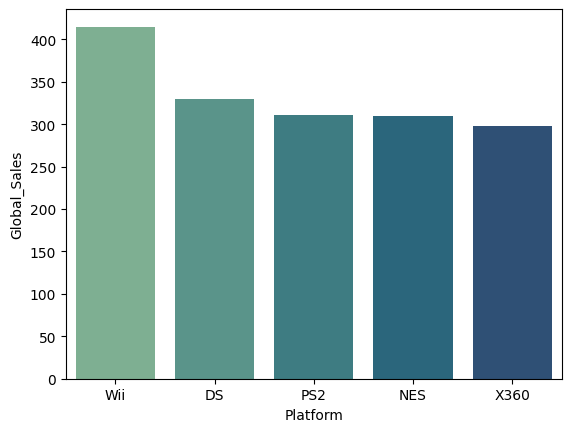

In [28]:
sns.barplot(x='Platform', y='Global_Sales', data=df.sort_values('Global_Sales', ascending=False), hue='Platform', palette='crest')


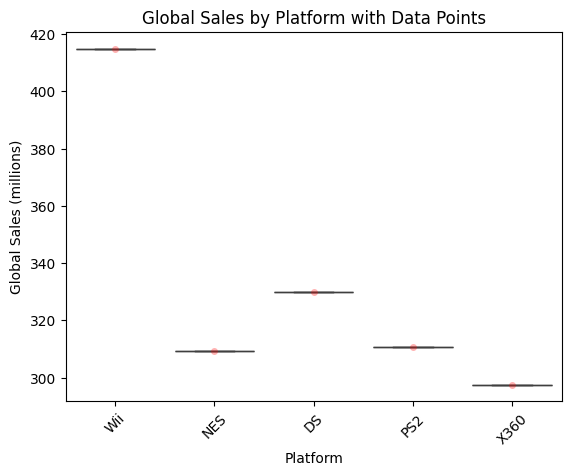

In [42]:
sns.boxplot(x='Platform', y='Global_Sales', data=df)
sns.stripplot(x='Platform', y='Global_Sales', data=df, color='red', alpha=0.3, jitter=True)

plt.title('Global Sales by Platform with Data Points')
plt.xlabel('Platform')
plt.ylabel('Global Sales (millions)')
plt.xticks(rotation=45)
plt.show()


Accuracy: 0.2440944881889764
              precision    recall  f1-score   support

      Action       0.25      0.53      0.34        85
   Adventure       0.00      0.00      0.00        12
    Fighting       0.00      0.00      0.00        23
        Misc       0.00      0.00      0.00        26
    Platform       0.19      0.33      0.24        30
      Puzzle       0.00      0.00      0.00         8
      Racing       0.00      0.00      0.00        37
Role-Playing       0.33      0.42      0.37        33
     Shooter       0.29      0.21      0.24        48
  Simulation       0.00      0.00      0.00        14
      Sports       0.23      0.25      0.24        57
    Strategy       0.00      0.00      0.00         8

    accuracy                           0.24       381
   macro avg       0.11      0.15      0.12       381
weighted avg       0.17      0.24      0.19       381



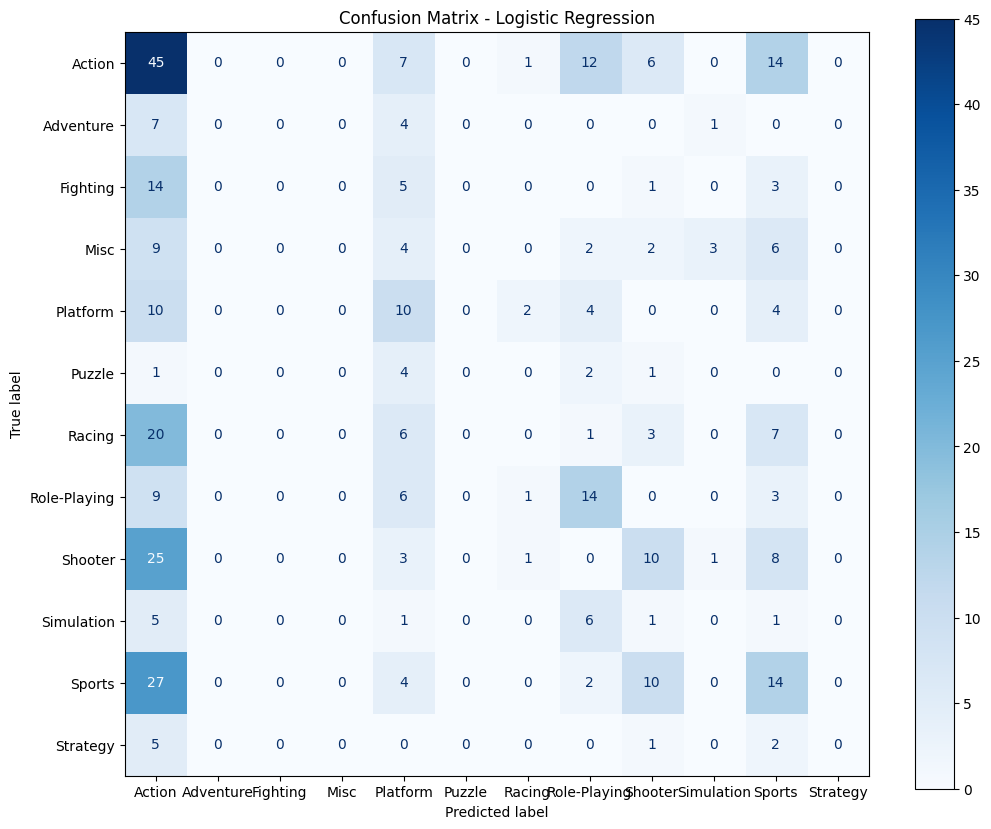

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load and clean data
df = pd.read_csv('vgsales.csv')
df = df.dropna(subset=['Platform', 'Year', 'Genre', 'Publisher', 'Global_Sales'])
df['Year'] = df['Year'].astype(int)

# Encode categorical variables
le_platform = LabelEncoder()
le_publisher = LabelEncoder()
le_genre = LabelEncoder()
df['Platform_enc'] = le_platform.fit_transform(df['Platform'])
df['Publisher_enc'] = le_publisher.fit_transform(df['Publisher'])
df['Genre_enc'] = le_genre.fit_transform(df['Genre'])

# Feature selection
X = df[['Platform_enc', 'Year', 'Publisher_enc', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
y = df['Genre_enc']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg, target_names=le_genre.classes_, zero_division=0))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_logreg)
fig, ax = plt.subplots(figsize=(12, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_genre.classes_)
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


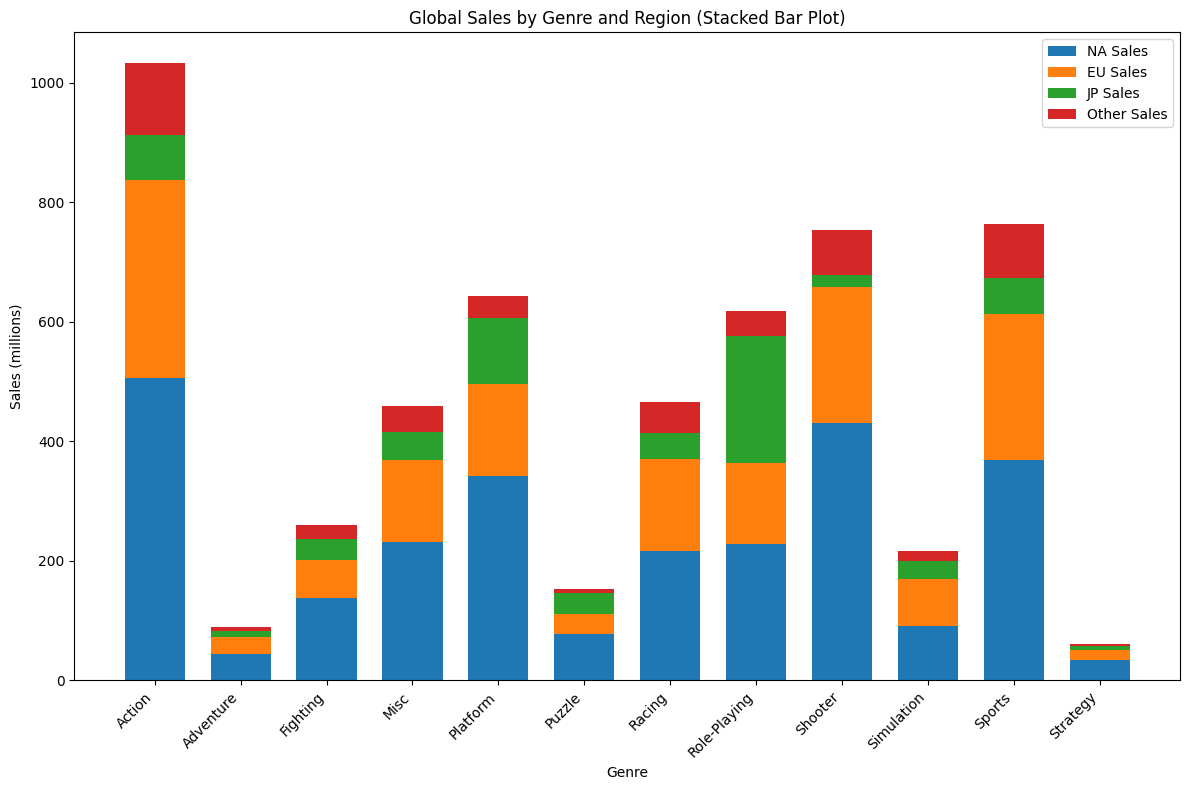

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame with columns: 'Genre', 'Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'

# Aggregate sales by genre
genre_sales = df.groupby('Genre').agg({
    'NA_Sales': 'sum',
    'EU_Sales': 'sum',
    'JP_Sales': 'sum',
    'Other_Sales': 'sum',
    'Global_Sales': 'sum'
}).reset_index()

# X axis labels
genres = genre_sales['Genre']

# Sales data for each region
na_sales = genre_sales['NA_Sales']
eu_sales = genre_sales['EU_Sales']
jp_sales = genre_sales['JP_Sales']
other_sales = genre_sales['Other_Sales']

# Positions on x-axis
x = np.arange(len(genres))

# Width of bars
width = 0.7

# Plot stacked bars
plt.figure(figsize=(12,8))

p1 = plt.bar(x, na_sales, width, label='NA Sales')
p2 = plt.bar(x, eu_sales, width, bottom=na_sales, label='EU Sales')
p3 = plt.bar(x, jp_sales, width, bottom=na_sales+eu_sales, label='JP Sales')
p4 = plt.bar(x, other_sales, width, bottom=na_sales+eu_sales+jp_sales, label='Other Sales')

# Labels and title
plt.xlabel('Genre')
plt.ylabel('Sales (millions)')
plt.title('Global Sales by Genre and Region (Stacked Bar Plot)')
plt.xticks(x, genres, rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()


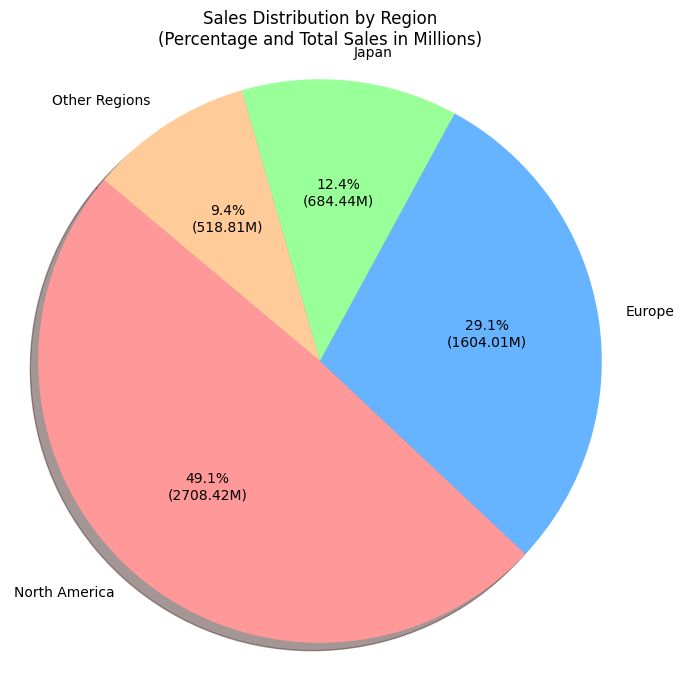

In [4]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with sales columns: 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'

# Sum sales by region
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Labels for the pie chart
labels = ['North America', 'Europe', 'Japan', 'Other Regions']

# Sales values
sizes = region_sales.values
total_sales = sizes.sum()

# Function to format labels with both percentage and sales in millions
def autopct_format(pct):
    absolute = pct * total_sales / 100
    return f"{pct:.1f}%\n({absolute:.2f}M)"

# Optional: colors for each slice
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Create pie chart
plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, autopct=autopct_format, startangle=140, colors=colors, shadow=True)

plt.title('Sales Distribution by Region\n(Percentage and Total Sales in Millions)')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.

plt.show()
